
... ***CURRENTLY UNDER DEVELOPMENT*** ...


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op
import sys

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


dict_keys(['__header__', '__version__', '__globals__', 'costa'])
(1, 1)


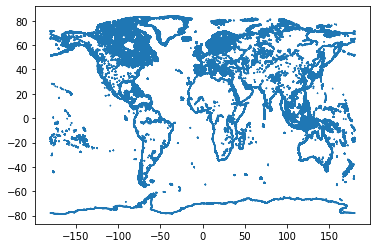

In [3]:
from scipy.io import loadmat
coastline = loadmat('/Users/albacid/DATABASES/coastlines/LineaCostaGlobal.mat')

print(coastline.keys())

print(coastline['costa'].shape)
costa = coastline['costa'][:]

lon = costa[0,0][0]
lat = costa[0,0][1]

plt.plot(lon, lat)

# Obtain info CSIRO

In [12]:
import climate_downloader_csiro as csiro

csiro.download_info_spec('spec.nc')
csiro.download_info_gridded('gridded')


downloading CSIRO spec stations...
done.
downloading gridded coordinates: glob_24m ... 
downloading gridded coordinates: pac_4m ... 
downloading gridded coordinates: pac_10m ... 
downloading gridded coordinates: aus_4m ... 
downloading gridded coordinates: aus_10m ... 
done.


[<xarray.Dataset>
 Dimensions:    (latitude: 391, longitude: 900)
 Coordinates:
   * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
   * latitude   (latitude) float32 -78.0 -77.6 -77.2 -76.8 ... 77.2 77.6 78.0
 Data variables:
     mask       (latitude, longitude) bool False False False ... False False
 Attributes:
     product_name:                    ww3.glob_24m.197901.nc
     area:                            Global 0.4 deg wave grid
     latitude_resolution:                0.4000000
     longitude_resolution:               0.4000000
     southernmost_latitude:           -78.0000000
     northernmost_latitude:           78.0000000
     westernmost_longitude:           0.0000000
     easternmost_longitude:           359.6000061
     minimum_altitude:                -12000 m
     maximum_altitude:                9000 m
     altitude_resolution:             n/a
     start_date:                      1979-01-01T00:00:00Z
     stop_date:                       1

# CSIRO spec data (ESPECTROS)


<xarray.Dataset>
Dimensions:       (station: 3683)
Coordinates:
  * station       (station) int32 1 2 3 4 5 6 ... 3678 3679 3680 3681 3682 3683
Data variables:
    longitude     (station) float32 ...
    latitude      (station) float32 ...
    station_name  (station) |S64 ...
350.0
-178.0


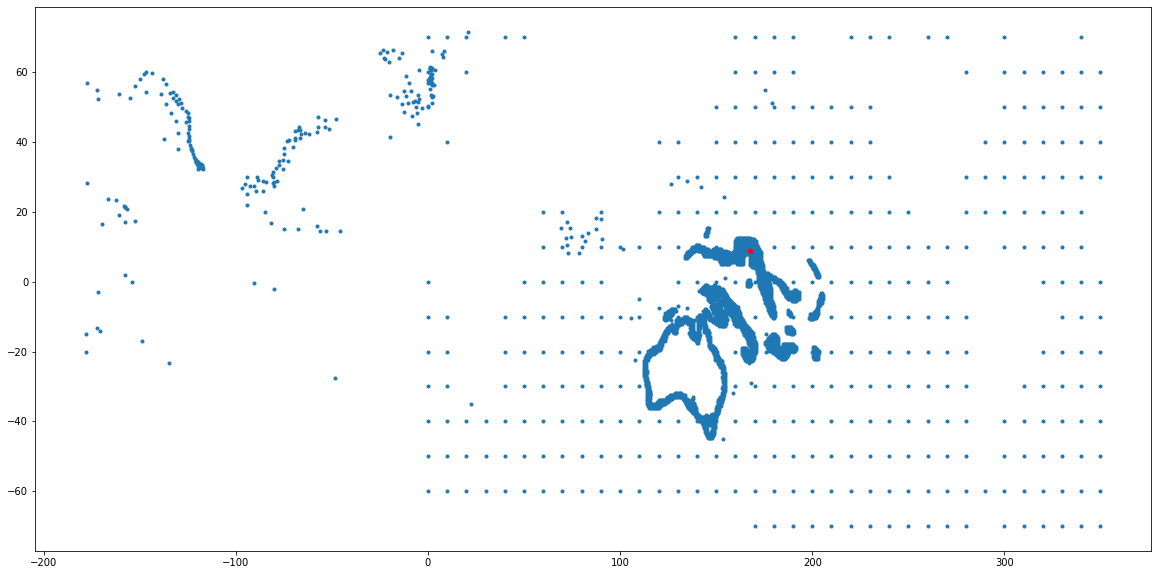

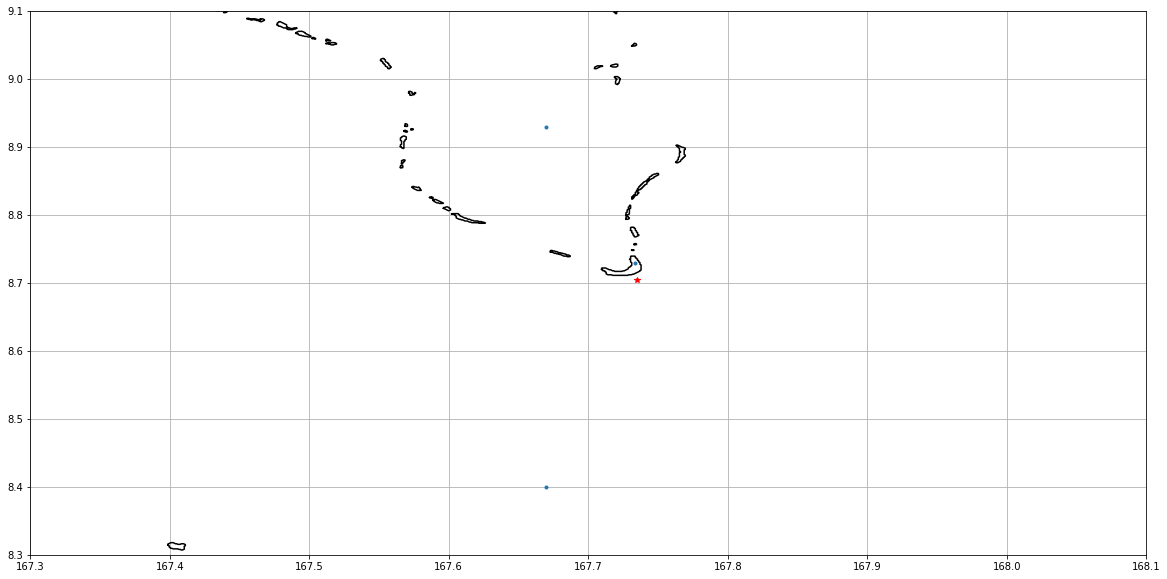

In [7]:
xds = xr.open_dataset('spec.nc')
print(xds)
print(np.max(xds.longitude.values))
print(np.min(xds.longitude.values))

plt.figure(figsize=(20,10))
plt.plot(xds.longitude, xds.latitude, '.')
plt.plot(167.735, 8.705, '*r')

plt.figure(figsize=(20,10))
plt.plot(xds.longitude, xds.latitude, '.')
plt.plot(167.735, 8.705, '*r')
plt.plot(lon, lat,'k')
plt.xlim(167.3,168.1)
plt.ylim(8.3,9.1)
plt.grid()

# <span style='color:Red'> el punto que me interesaría está en torno a (167.7, 8.4) </span>


# CSIRO gridded data (PARTICIONES)


## Pacific grid (4')

<xarray.Dataset>
Dimensions:    (latitude: 751, longitude: 1276)
Coordinates:
  * longitude  (longitude) float32 125.0 125.066666 ... 209.93376 210.00043
  * latitude   (latitude) float32 -30.0 -29.933332 ... 19.933582 20.00025
Data variables:
    mask       (latitude, longitude) bool ...
Attributes:
    product_name:                    ww3.pac_4m.197901.nc
    area:                            Pacific 4 min wave grid
    latitude_resolution:                0.0666667
    longitude_resolution:               0.0666667
    southernmost_latitude:           -30.0000000
    northernmost_latitude:           20.0002499
    westernmost_longitude:           125.0000000
    easternmost_longitude:           210.0004272
    minimum_altitude:                -12000 m
    maximum_altitude:                9000 m
    altitude_resolution:             n/a
    start_date:                      1979-01-01T00:00:00Z
    stop_date:                       1979-01-31T23:00:00Z
    date_created:                    

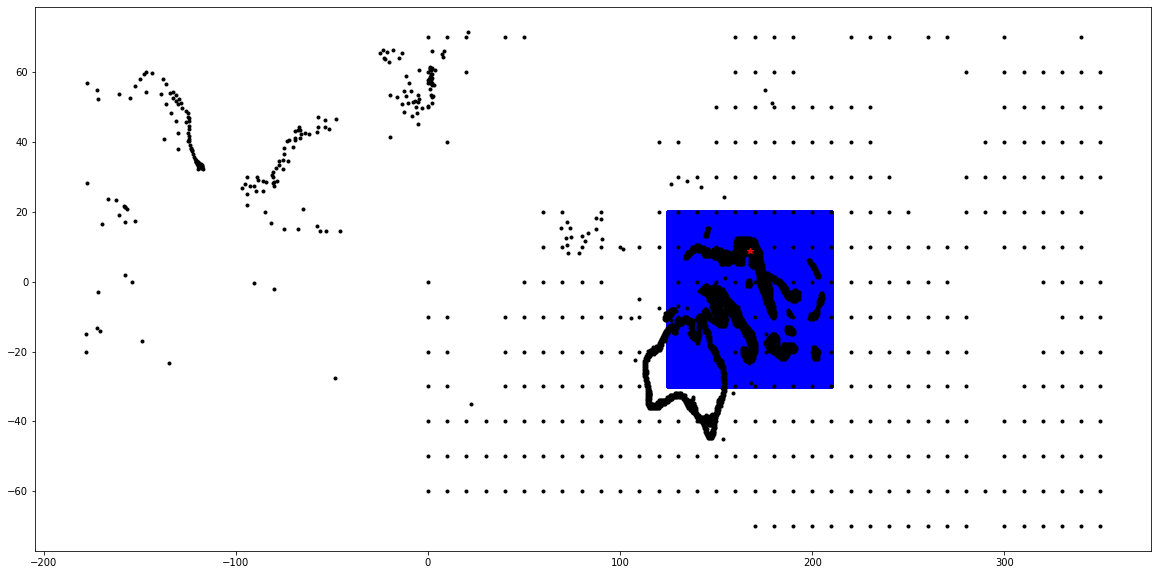

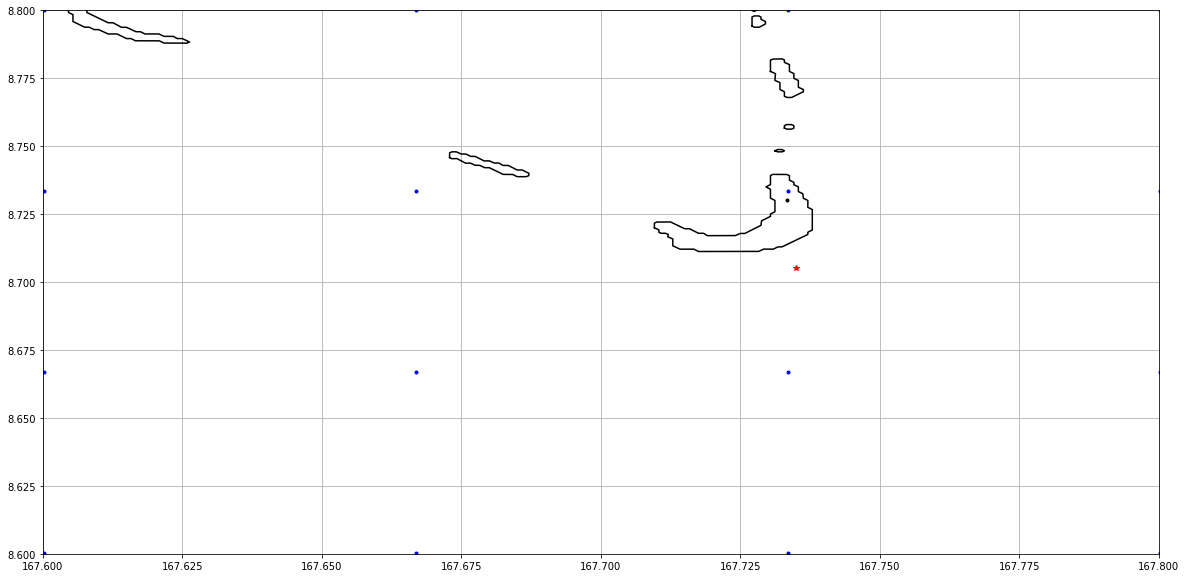

In [40]:
xds_pac_4m = xr.open_dataset('./gridded/pac_4m.nc')
print(xds_pac_4m)
lon_pac_4m, lat_pac_4m = np.meshgrid(xds_pac_4m.longitude, xds_pac_4m.latitude)

plt.figure(figsize=(20,10))
plt.plot(lon_pac_4m, lat_pac_4m, '.b')
plt.plot(xds.longitude, xds.latitude, '.k')
plt.plot(167.735, 8.705, '*r')


plt.figure(figsize=(20,10))
plt.plot(lon_pac_4m, lat_pac_4m, '.b')
plt.plot(xds.longitude, xds.latitude, '.k')
plt.plot(167.735, 8.705, '*r')
plt.plot(lon, lat,'k')
plt.xlim(167.6,167.8)
plt.ylim(8.6,8.8)
plt.grid()

# <span style='color:Red'> el punto que me interesaría está en torno a (167.73, 8.66) </span>


## Global grid (24')

<xarray.Dataset>
Dimensions:    (latitude: 391, longitude: 900)
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
  * latitude   (latitude) float32 -78.0 -77.6 -77.2 -76.8 ... 77.2 77.6 78.0
Data variables:
    mask       (latitude, longitude) bool ...
Attributes:
    product_name:                    ww3.glob_24m.197901.nc
    area:                            Global 0.4 deg wave grid
    latitude_resolution:                0.4000000
    longitude_resolution:               0.4000000
    southernmost_latitude:           -78.0000000
    northernmost_latitude:           78.0000000
    westernmost_longitude:           0.0000000
    easternmost_longitude:           359.6000061
    minimum_altitude:                -12000 m
    maximum_altitude:                9000 m
    altitude_resolution:             n/a
    start_date:                      1979-01-01T00:00:00Z
    stop_date:                       1979-01-31T23:00:00Z
    date_created:              

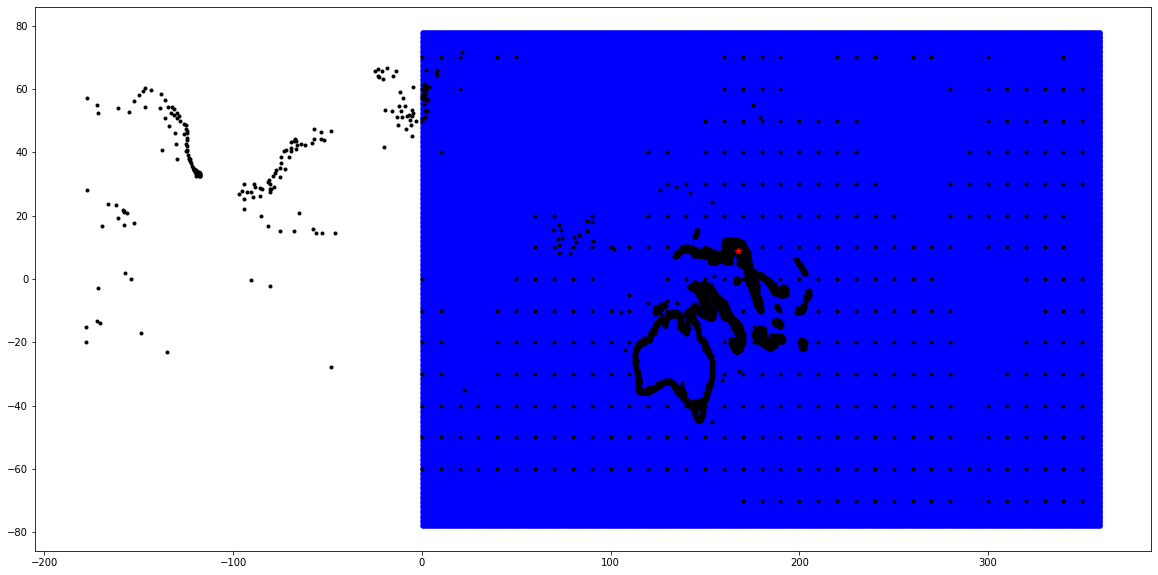

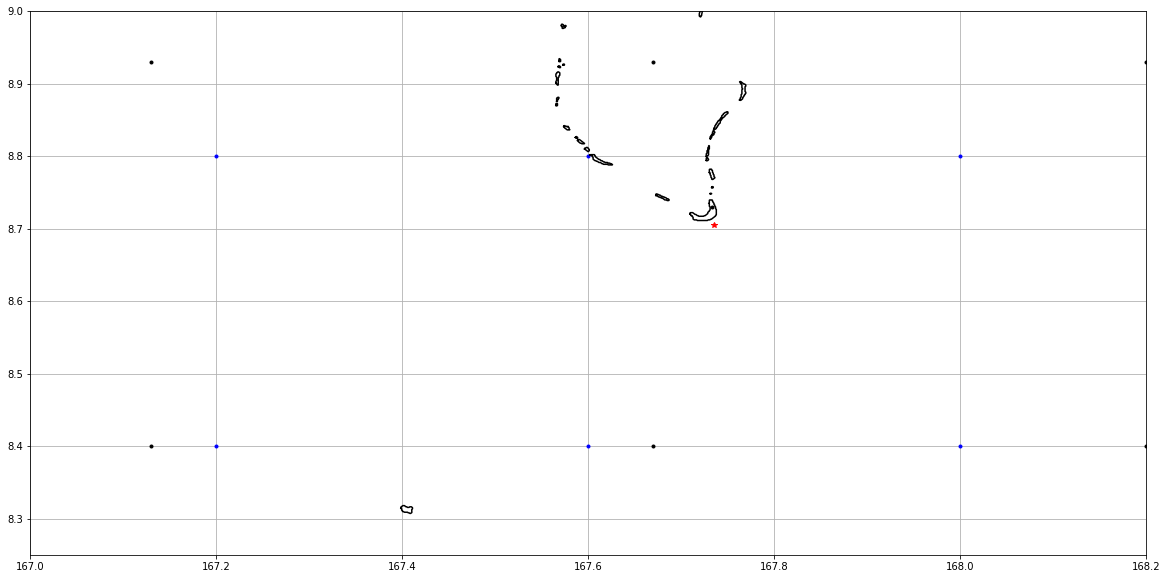

In [47]:
xds_glob_24m = xr.open_dataset('./gridded/glob_24m.nc')
print(xds_glob_24m)
lon_glob_24m, lat_glob_24m = np.meshgrid(xds_glob_24m.longitude, xds_glob_24m.latitude)


plt.figure(figsize=(20,10))
plt.plot(lon_glob_24m, lat_glob_24m, '.b')
plt.plot(xds.longitude, xds.latitude, '.k')
plt.plot(167.735, 8.705, '*r')

plt.figure(figsize=(20,10))
plt.plot(lon_glob_24m, lat_glob_24m, '.b')
plt.plot(xds.longitude, xds.latitude, '.k')
plt.plot(167.735, 8.705, '*r')
plt.plot(lon, lat,'k')
plt.xlim(167,168.2)
plt.ylim(8.25, 9)
plt.grid()

# <span style='color:Red'> el punto que me interesaría está en torno a (167.6, 8.4) </span>
# <span style='color:Red'> el punto que me interesaría está en torno a (168, 8.4) </span>


## Autralian grid (4')

<xarray.Dataset>
Dimensions:    (latitude: 796, longitude: 1126)
Coordinates:
  * longitude  (longitude) float32 100.0 100.066666 ... 174.9337 175.00038
  * latitude   (latitude) float32 -50.0 -49.933334 ... 2.933598 3.000265
Data variables:
    mask       (latitude, longitude) bool ...
Attributes:
    product_name:                    ww3.aus_4m.197901.nc
    area:                            4 min Australian grid
    latitude_resolution:                0.0666667
    longitude_resolution:               0.0666667
    southernmost_latitude:           -50.0000000
    northernmost_latitude:           3.0002649
    westernmost_longitude:           100.0000000
    easternmost_longitude:           175.0003815
    minimum_altitude:                -12000 m
    maximum_altitude:                9000 m
    altitude_resolution:             n/a
    start_date:                      1979-01-01T00:00:00Z
    stop_date:                       1979-01-31T23:00:00Z
    date_created:                    2012-

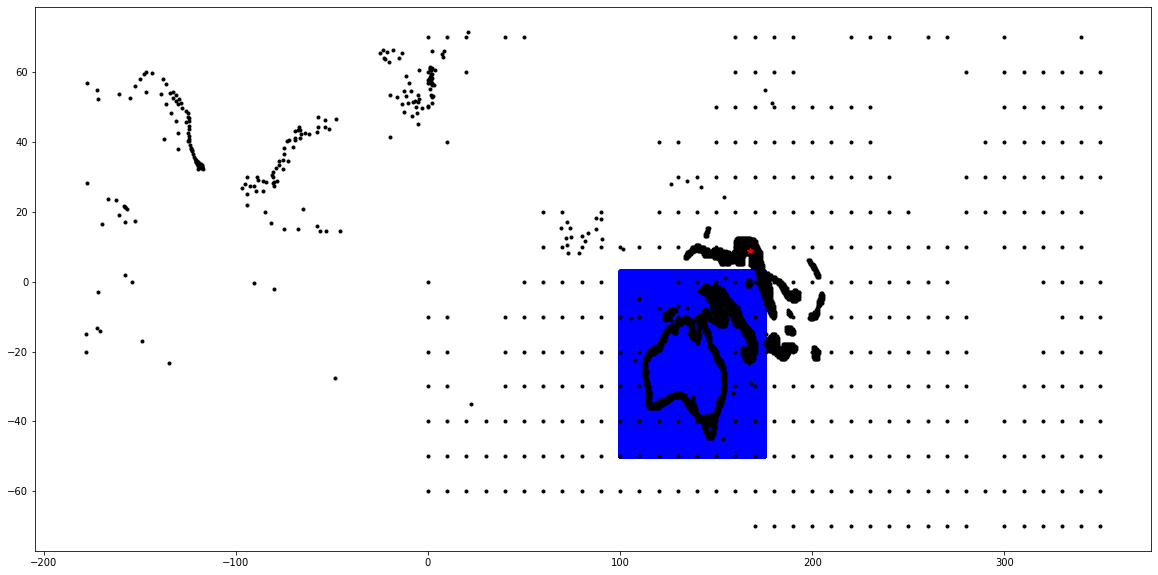

In [7]:
xds_aus_4m = xr.open_dataset('./gridded/aus_4m.nc')
print(xds_aus_4m)
lon_aus_4m, lat_aus_4m = np.meshgrid(xds_aus_4m.longitude, xds_aus_4m.latitude)


plt.figure(figsize=(20,10))
plt.plot(lon_aus_4m, lat_aus_4m, '.b')
plt.plot(xds.longitude, xds.latitude, '.k')
plt.plot(167.735, 8.705, '*r')
